HomeWork :

1. The Central Limit Theorem
2. Skewed Distribution
    a. Positively skewed
    b. Negatively skewed 
3. Exponential Distribution
4. Binomial Distribution (PMF)
5. Multinomial Distribution
6. Using the median identify the IQR (inter quartile range)
7. z-score, p value and confidence intervals

In [2]:
import numpy as np
import seaborn as sns
from scipy import stats as st
import matplotlib.pyplot as plt

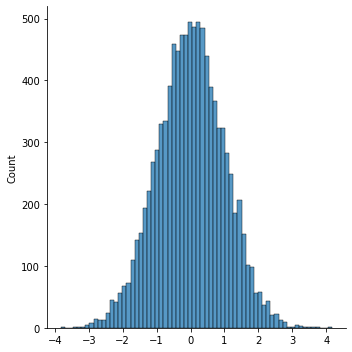

In [11]:
x = np.random.normal(size=10000)
sns.displot(x)

In [12]:
print(x)

[ 0.71068796  0.45334545  1.07230649 ... -1.32570392  0.11952402
  0.33680119]


In [13]:
x_sample = np.random.choice(x, size = 10)
x_sample

array([ 0.68584465,  0.44662247, -0.95007305,  1.46196925,  0.48272352,
        1.72415443, -1.48493438,  0.90208754, -1.36115076,  1.62695375])

In [14]:
np.mean(x_sample)

0.353419742487709

In [15]:
#Append the means of all the samples from a normal distribution
def mean_sample(inp, size, n_samples):
    sample_means = []
    for i in range(n_samples):
        sample = np.random.choice(inp, size = size, replace = False)
        sample_means.append(sample.mean())
    return sample_means

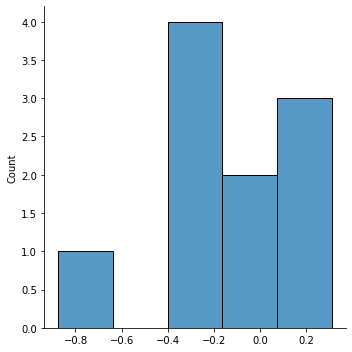

In [16]:
sns.displot(mean_sample(x, 10, 10))

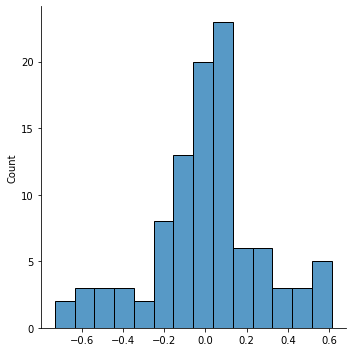

In [17]:
sns.displot(mean_sample(x, 10, 100))

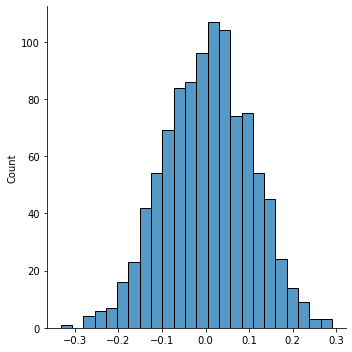

In [12]:
sns.displot(mean_sample(x, 100, 1000))

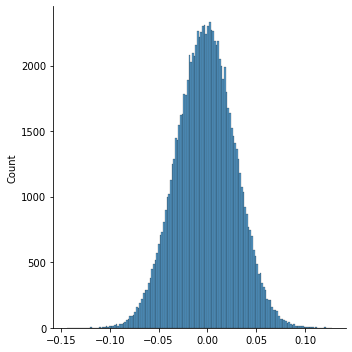

In [16]:
sns.displot(mean_sample(x, 1000, 100000))

The more no of samples you take, the more likely it is that the sampling distribution of the means will follow a normal distribution. This is called as Central Limit Theorem

#### Positive or right Skewed

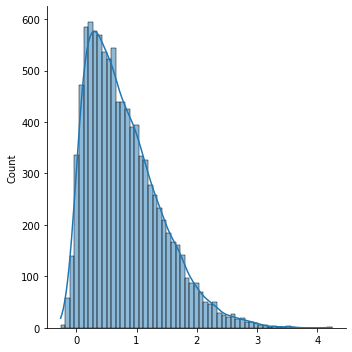

In [23]:
s = st.skewnorm.rvs(10, size = 10000)
sns.displot(s, kde = True)

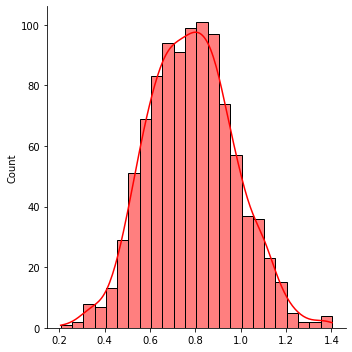

In [23]:
sns.displot(mean_sample(s, 10, 1000), color = 'red', kde='True')

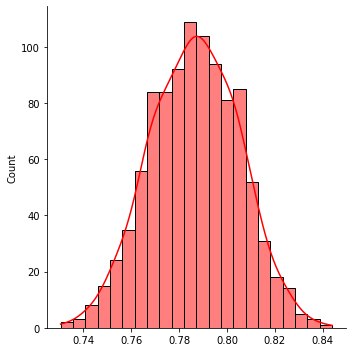

In [24]:
sns.displot(mean_sample(s, 1000, 1000), color = 'red', kde='True')

#### Negative or left Skewed

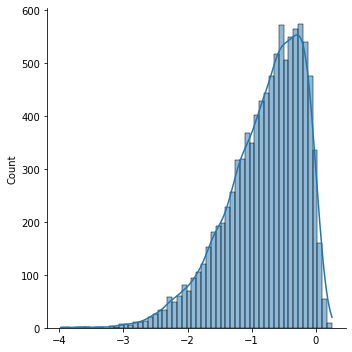

In [24]:
s = st.skewnorm.rvs(-10, size = 10000)
sns.displot(s, kde = True)

#### Z- Score

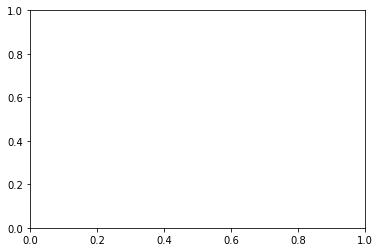

In [28]:
fig, ax = plt.subplots()

In [40]:
score = 90
mean = 70
sd = 10

/usr/local/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

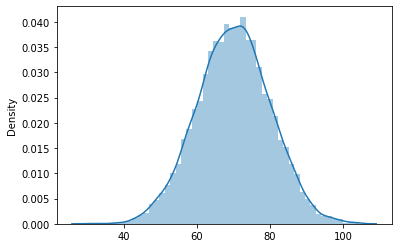

In [41]:
x = np.random.normal(mean, sd, 10000)
sns.distplot(x)

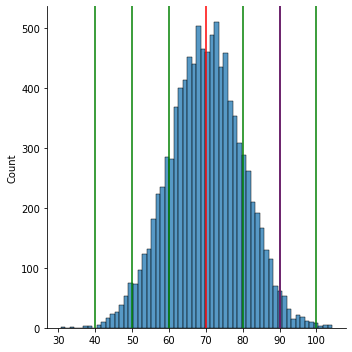

In [42]:
sns.displot(x)
ax.set_xlim(0,100)
plt.axvline(mean, color = 'red')
for zones in [-3, -2, -1, 1, 2, 3]:
    plt.axvline(mean+zones*sd, color='green')
plt.axvline(score, color = 'purple')

In [44]:
z_score = (score - mean)/sd
z_score

2.0

In [45]:
len(np.where(x>90)[0])

217

In [46]:
100*217/10000

2.17

#### p - Value

/usr/local/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

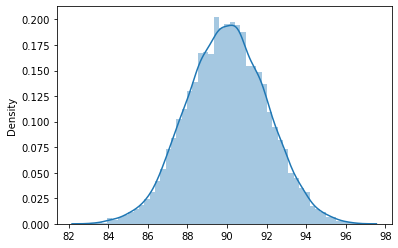

In [48]:
mean = 90
sd = 2
x = np.random.normal(mean, sd, 10000)
sns.distplot(x, kde=True)

In [78]:
p_low = st.norm.cdf(-2.5)
p_low

0.006209665325776132

In [74]:
p_low * 10000

668.0720126885807

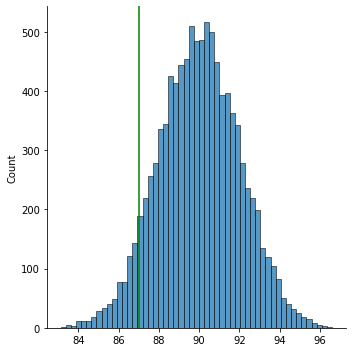

In [66]:
sns.displot(x)
plt.axvline(mean-1.5*sd, color = 'green')

In [67]:
st.norm.cdf(1.5)

0.9331927987311419

In [79]:
p_above = 1 - st.norm.cdf(2.5)
p_above

0.006209665325776159

In [76]:
p_above*10000

668.0720126885808

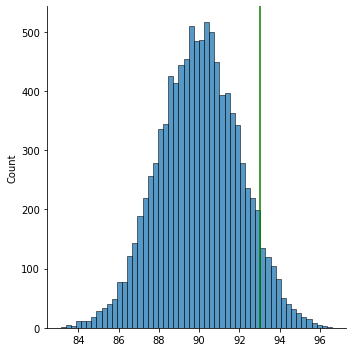

In [70]:
sns.displot(x)
plt.axvline(mean+1.5*sd, color = 'green')

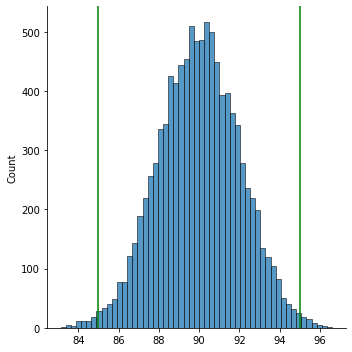

In [63]:
sns.displot(x)
plt.axvline(mean+2.5*sd, color = 'green')
plt.axvline(mean-2.5*sd, color = 'green')

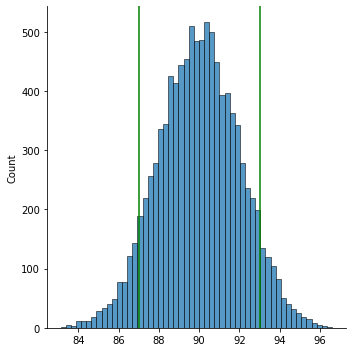

In [71]:
sns.displot(x)
plt.axvline(mean+1.5*sd, color = 'green')
plt.axvline(mean-1.5*sd, color = 'green')

In [80]:
p_outside = p_low + p_above
p_outside

0.01241933065155229

In [77]:
p_outside = p_low + p_above
p_outside

0.13361440253771617

#### Confidence Intervals

In [84]:
x = np.array([32, 42, 45, 23, 20, 19, 56])

In [85]:
x_bar = x.mean()
x_std = x.std()
n = x.size

In [86]:
z = 1.0

In [87]:
def CI(z, s, n):
    return z*(s/n**(1/2))

In [88]:
CI(z, x_std, n)

4.979257265441493

In [93]:
x_bar + CI(z, x_std, n), x_bar - CI(z, x_std, n)

(43.61648709740818, 24.097798616877526)

In [89]:
x_bar + CI(z, x_std, n), x_bar - CI(z, x_std, n)

(38.83640012258435, 28.87788559170136)